<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [9]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [11]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [12]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


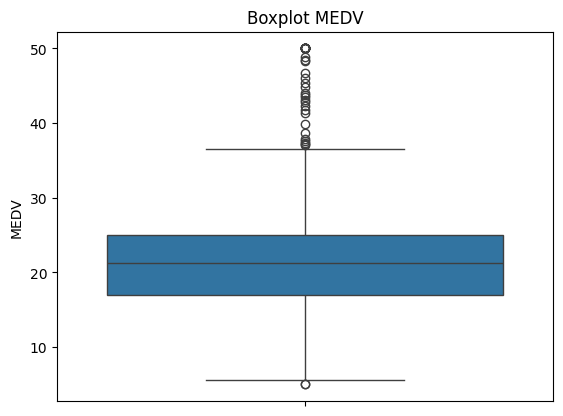

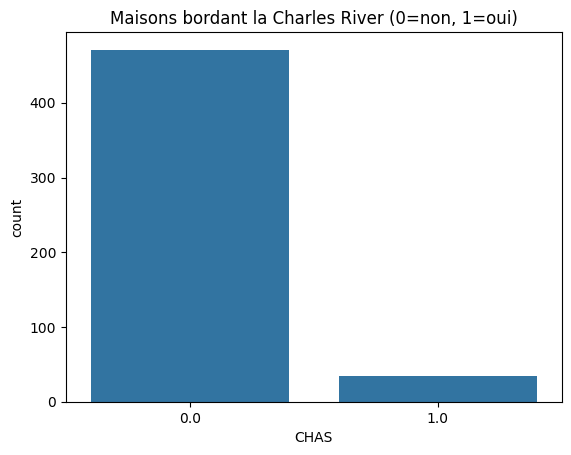

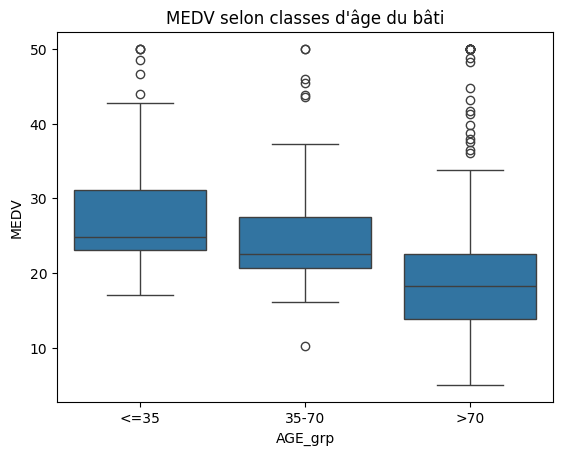

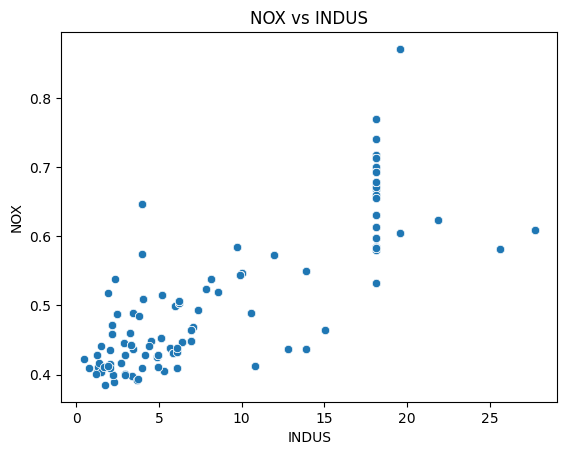

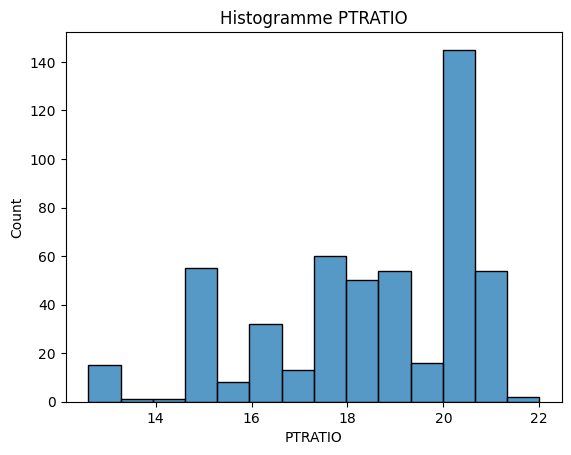

T-test MEDV ~ CHAS
t = 3.113291312794837 p = 0.003567170098137517
Conclusion: on rejette H0. Il existe une différence de MEDV selon CHAS.

ANOVA MEDV ~ AGE_grp
                  sum_sq     df         F        PR(>F)
C(AGE_grp)   5401.731883    2.0  36.40765  1.710501e-15
Residual    37314.563532  503.0       NaN           NaN


<ipython-input-13-000802363390>:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val_anova = anova_table["PR(>F)"][0]


Conclusion: on rejette H0. MEDV diffère selon les classes d'âge.

Corrélation Pearson NOX vs INDUS
r = 0.7636514469209192 p = 7.913361061210442e-98
Conclusion: on rejette H0. NOX et INDUS sont corrélés.

Régression linéaire MEDV ~ DIS
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        17:34:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                 

In [13]:
# 2. Boxplot de la valeur médiane des maisons (MEDV)
pyplot.figure()
sns.boxplot(y="MEDV", data=boston_df)
pyplot.title("Boxplot MEDV")
pyplot.show()

# 3. Bar plot pour la variable CHAS (Charles River)
pyplot.figure()
sns.countplot(x="CHAS", data=boston_df)
pyplot.title("Maisons bordant la Charles River (0=non, 1=oui)")
pyplot.show()

# 4. Discrétisation de AGE en 3 classes
bins = [0, 35, 70, boston_df["AGE"].max()]
labels = ["<=35", "35-70", ">70"]
boston_df["AGE_grp"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels, include_lowest=True)

# 5. Boxplot MEDV vs AGE_grp
pyplot.figure()
sns.boxplot(x="AGE_grp", y="MEDV", data=boston_df)
pyplot.title("MEDV selon classes d'âge du bâti")
pyplot.show()

# 6. Scatter NOX vs INDUS
pyplot.figure()
sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
pyplot.title("NOX vs INDUS")
pyplot.show()
# Lecture attendue: relation positive. Plus la part d'activité non commerciale est élevée, plus NOX est élevé.

# 7. Histogramme de PTRATIO
pyplot.figure()
sns.histplot(boston_df["PTRATIO"], kde=False)
pyplot.title("Histogramme PTRATIO")
pyplot.show()

# ===================== TESTS STATISTIQUES =====================

alpha = 0.05

# 1. T-test MEDV ~ CHAS
# H0: moyenne(MEDV | CHAS=1) = moyenne(MEDV | CHAS=0)
# H1: différentes
medv_chas1 = boston_df[boston_df["CHAS"] == 1]["MEDV"]
medv_chas0 = boston_df[boston_df["CHAS"] == 0]["MEDV"]
t_stat, p_val = scipy.stats.ttest_ind(medv_chas1, medv_chas0, equal_var=False)
print("T-test MEDV ~ CHAS")
print("t =", t_stat, "p =", p_val)
if p_val < alpha:
    print("Conclusion: on rejette H0. Il existe une différence de MEDV selon CHAS.")
else:
    print("Conclusion: on ne rejette pas H0. Pas de différence de MEDV selon CHAS.")

# 2. ANOVA MEDV ~ AGE_grp
# H0: toutes les moyennes de MEDV sont égales entre les 3 groupes d'âge
# H1: au moins une moyenne diffère
model_anova = ols("MEDV ~ C(AGE_grp)", data=boston_df).fit()
anova_table = sm.stats.anova_lm(model_anova, typ=2)
print("\nANOVA MEDV ~ AGE_grp")
print(anova_table)
p_val_anova = anova_table["PR(>F)"][0]
if p_val_anova < alpha:
    print("Conclusion: on rejette H0. MEDV diffère selon les classes d'âge.")
else:
    print("Conclusion: on ne rejette pas H0. Pas de différence significative.")

# 3. Corrélation Pearson NOX vs INDUS
# H0: corrélation = 0
# H1: corrélation ≠ 0
corr, p_corr = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print("\nCorrélation Pearson NOX vs INDUS")
print("r =", corr, "p =", p_corr)
if p_corr < alpha:
    print("Conclusion: on rejette H0. NOX et INDUS sont corrélés.")
else:
    print("Conclusion: on ne rejette pas H0. Pas de corrélation détectée.")

# 4. Régression linéaire MEDV ~ DIS
# H0: le coefficient de DIS = 0
# H1: le coefficient de DIS ≠ 0
X = sm.add_constant(boston_df["DIS"])
y = boston_df["MEDV"]
model_reg = sm.OLS(y, X).fit()
print("\nRégression linéaire MEDV ~ DIS")
print(model_reg.summary())
p_dis = model_reg.pvalues["DIS"]
coef_dis = model_reg.params["DIS"]
if p_dis < alpha:
    print(f"Conclusion: on rejette H0. DIS a un effet sur MEDV. Coef DIS = {coef_dis}.")
else:
    print("Conclusion: on ne rejette pas H0. Pas d'effet significatif de DIS.")
